[-44.26607669 -44.26692761 -44.26777852 -44.26862942 -44.26948031
 -44.27033118 -44.27118204 -44.27203289 -44.27288373 -44.27373455
 -44.27458537 -44.27543617 -44.27628696 -44.27713773 -44.2779885
 -44.27883925 -44.27968999 -44.28054072 -44.28139144 -44.28224214
 -44.28309284 -44.28394352 -44.28479419 -44.28564484 -44.28649549
 -44.28734612 -44.28819674 -44.28904735 -44.28989795 -44.29074854
 -44.29159911 -44.29244967 -44.29330022 -44.29415076 -44.29500128
 -44.29585179 -44.2967023  -44.29755278 -44.29840326 -44.29925373
 -44.30010418 -44.30095462 -44.30180505 -44.30265547 -44.30350587
 -44.30435627 -44.30520665 -44.30605702 -44.30690737 -44.30775772
 -44.30860805 -44.30945837 -44.31030868 -44.31115898 -44.31200926
 -44.31285954 -44.3137098  -44.31456005 -44.31541029 -44.31626051
 -44.31711072 -44.31796093 -44.31881112 -44.31966129 -44.32051146
 -44.32136161 -44.32221175 -44.32306188 -44.323912   -44.32476211
 -44.3256122  -44.32646228 -44.32731235 -44.32816241 -44.32901245
 -44.329862

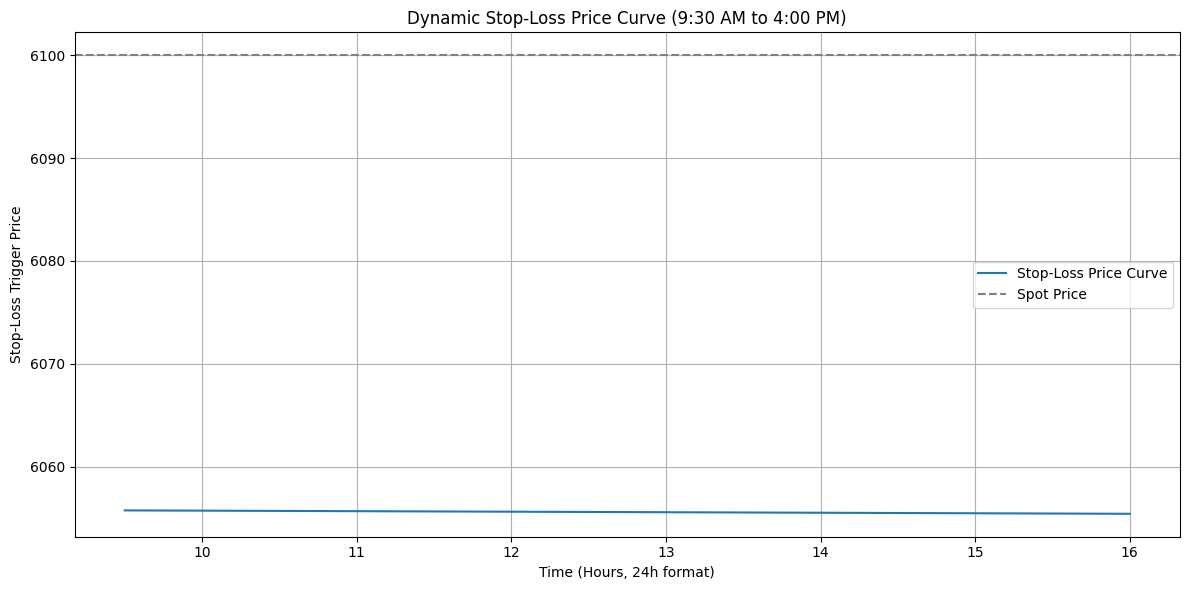

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Constants and inputs
S0 = 6100               # Spot price
delta = -0.016          # Delta
gamma = 0.001           # Gamma
theta_daily = -0.02     # Theta per day (dollar decay per day)
P0 = 0.35               # Entry spread price
P_stop = 2.038          # Stop loss spread price

delta_V = P_stop - P0   # Price increase triggering stop loss

# Market time
market_open = datetime.strptime("09:30", "%H:%M")
market_close = datetime.strptime("16:00", "%H:%M")
total_seconds = (market_close - market_open).seconds
total_days = 1 #/ 252     # 1 trading day in years

# Time vector in seconds from open to close, step 60s (1 minute)
time_seconds = np.arange(0, total_seconds + 60, 60)
time_days = (time_seconds / total_seconds) * total_days  # convert to fraction of year

def calc_delta_S(t):
    """
    Calculate delta_S(t) solving quadratic:
    (1/2)*gamma*delta_S^2 + delta*delta_S + theta*t - delta_V = 0
    """
    a = 0.5 * gamma
    b = delta
    c = theta_daily * t - delta_V

    discriminant = b**2 - 4*a*c
    # Guard against negative discriminant due to inputs
    discriminant = np.where(discriminant < 0, 0, discriminant)

    sqrt_disc = np.sqrt(discriminant)
    # Choose the negative root for price drop
    delta_S = (-b - sqrt_disc) / (2*a)
    return delta_S

# Calculate delta_S(t) for each time point
delta_S_t = calc_delta_S(time_days)
print(delta_S_t)
# Calculate stop loss price curve
S_stop_t = S0 + delta_S_t

# Generate time labels for x-axis (hours:minutes)
time_labels = [(market_open + timedelta(seconds=int(s))).strftime("%H:%M") for s in time_seconds]
print(time_days)
# Plotting
plt.figure(figsize=(12,6))
plt.plot(time_seconds / 3600 + 9.5, S_stop_t, label="Stop-Loss Price Curve")
plt.axhline(S0, color='gray', linestyle='--', label="Spot Price")
plt.xlabel("Time (Hours, 24h format)")
plt.ylabel("Stop-Loss Trigger Price")
plt.title("Dynamic Stop-Loss Price Curve (9:30 AM to 4:00 PM)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
delta_s = [1,2,3,4]
s=10

s_list = [s] * len(delta_s)
new = [s_i - d_i for s_i, d_i in zip(s_list, delta_s)]
print(new)

def calc_stop_loss_delta_price(open_credit, stop_debit, delta, gamma, theta, t):
    """Calcuate price change of a underlying to hit stop loss as a function of time

    Args:
        open_credit (_type_): _description_
        stop_debit (_type_): _description_
        delta (_type_): _description_
        gamma (_type_): _description_
        theta (_type_): _description_
        t (_type_): _description_
    """
    
    # (1/2)*gamma*delta_S^2 + delta*delta_S + theta*t - delta_V = 0
    # delta_V = stop_debit - open_credit
    
    a = 0.5 * gamma
    b = delta
    c = theta * t - (stop_debit - open_credit)
    
    val_square = b**2 - 4*a*c
    val_square = np.where(val_square < 0, 0, val_square)
    val = np.sqrt(val_square)
    
    delta_S = (-b - val) / (2 * a)
    return 

def get_stop_loss_barrier_curve(s, delta_S: list):
    s_list = [s] * len(delta_S)
    return [s_i - d_i for s_i, d_i in zip(s_list, delta_S)]

# === Parameters ===
S0 = 6100                    # Initial SPX price
T = 2 / (24 * 252)           # 2 hours to expiry in trading-year terms
sigma = 0.13                 # Annualized implied volatility
r = 0.04                     # Risk-free rate
n_paths = 100_000            # Number of Monte Carlo simulations
n_steps = 120                # Steps from now to expiry (1-minute granularity)

dt = T / n_steps
time_grid = np.linspace(0, T, n_steps)

# === Define the corrected moving stop-loss barrier ===
delta_S0 = -44.28            # Initial stop distance (S0 - stop price)

S0 = 6100               # Spot price
delta = -0.016          # Delta
gamma = 0.001           # Gamma
theta_daily = -0.02     # Theta per day (dollar decay per day)
P0 = 0.35               # Entry spread price
P_stop = 2.038          # Stop loss spread price

delta_V = P_stop - P0   # Price increase triggering stop loss

calc_stop_loss_delta_price(P0, P_stop, delta, gamma, theta_daily, )

[9, 8, 7, 6]


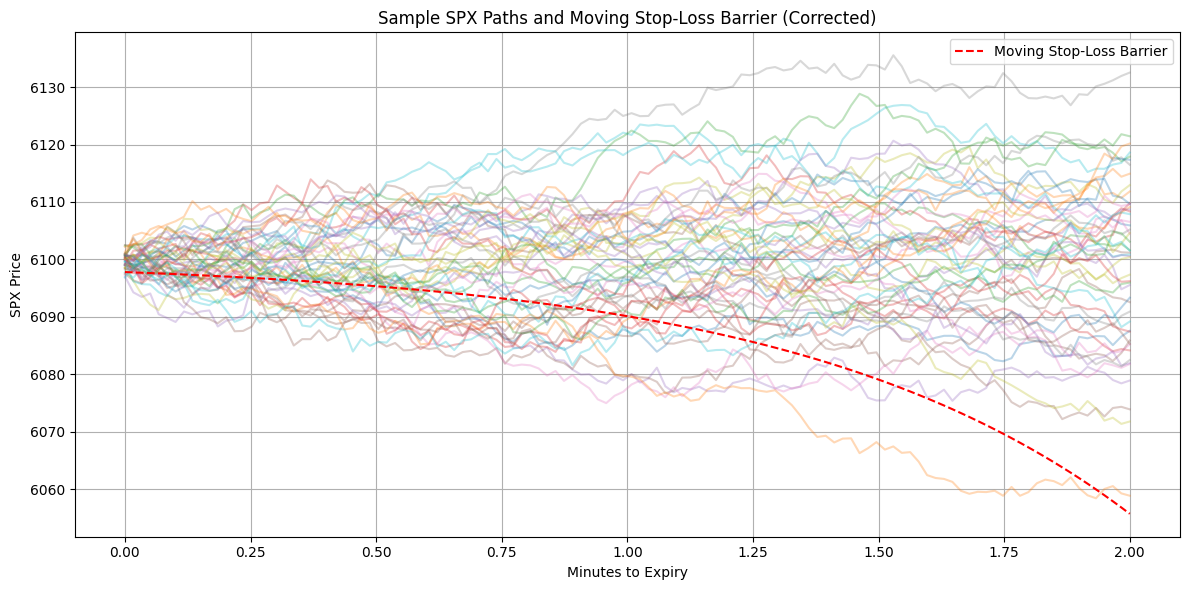

Estimated probability of hitting stop-loss: 0.6642


In [4]:
# Final Monte Carlo script with corrected stop-loss curve (loosens toward expiry)

import numpy as np
import matplotlib.pyplot as plt

# === Parameters ===
S0 = 6100                    # Initial SPX price
T = 2 / (24 * 252)           # 2 hours to expiry in trading-year terms
sigma = 0.13                 # Annualized implied volatility
r = 0.04                     # Risk-free rate
n_paths = 100_000            # Number of Monte Carlo simulations
n_steps = 120                # Steps from now to expiry (1-minute granularity)

dt = T / n_steps
time_grid = np.linspace(0, T, n_steps)

# === Define the corrected moving stop-loss barrier ===
delta_S0 = -44.28            # Initial stop distance (S0 - stop price)
decay_rate = 3.0             # Controls how fast stop relaxes

def stop_barrier(t):
    """Stop-loss price that loosens over time."""
    return S0 + delta_S0 * np.exp(-decay_rate * (T - t) / T)

stop_prices = stop_barrier(time_grid)

# === Simulate Geometric Brownian Motion price paths ===
np.random.seed(42)
Z = np.random.randn(n_paths, n_steps)
drift = (r - 0.5 * sigma ** 2) * dt
diffusion = sigma * np.sqrt(dt)
log_returns = drift + diffusion * Z
log_price_paths = np.cumsum(log_returns, axis=1)
log_price_paths = np.hstack((np.zeros((n_paths, 1)), log_price_paths))  # prepend initial price
S_paths = S0 * np.exp(log_price_paths)

# === Evaluate stop-loss breach across paths ===
hit_stop = (S_paths[:, 1:] <= stop_prices).any(axis=1)
p_stop = np.mean(hit_stop)

# === Plot example paths and stop-loss barrier ===
plt.figure(figsize=(12, 6))
for i in range(50):
    plt.plot(time_grid * 252 * 24, S_paths[i, 1:], alpha=0.3)

plt.plot(time_grid * 252 * 24, stop_prices, 'r--', label='Moving Stop-Loss Barrier')
plt.title("Sample SPX Paths and Moving Stop-Loss Barrier (Corrected)")
plt.xlabel("Minutes to Expiry")
plt.ylabel("SPX Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Estimated probability of hitting stop-loss: {p_stop:.4f}")


In [12]:
import math
import numpy as np
def norm_cdf(x):
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0

def black_scholes_price(S0, K, T, r, sigma, option_type):
    if T <= 0:
        return max(K - S0, 0) if option_type == 'put' else max(S0 - K, 0)
    
    d1 = (math.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    if option_type == 'call':
        return S0 * norm_cdf(d1) - K * math.exp(-r * T) * norm_cdf(d2)
    else:
        return K * math.exp(-r * T) * norm_cdf(-d2) - S0 * norm_cdf(-d1)

def find_spot_price(theo_price, K, T, r, sigma, option_type, tol=1e-8, max_iter=1000):
    if theo_price < 0:
        raise ValueError("Option price cannot be negative")
    
    # Set lower bound to avoid log(0)
    low = 1e-10  # Small positive value instead of zero
    high = 10 * K  # Conservative upper bound
    
    # Adjust high to ensure the root is bracketed
    f_low = black_scholes_price(low, K, T, r, sigma, option_type) - theo_price
    f_high = black_scholes_price(high, K, T, r, sigma, option_type) - theo_price
    
    # For puts: f_low > 0 and f_high < 0 due to negative relationship
    if option_type == 'put':
        while f_high >= 0:  # Put price too low, increase spot
            high *= 2
            f_high = black_scholes_price(high, K, T, r, sigma, option_type) - theo_price
            if high > 1e12:  # Safety break
                raise RuntimeError("Upper bound too high")
    
    # Bisection loop
    for _ in range(max_iter):
        mid = (low + high) / 2
        f_mid = black_scholes_price(mid, K, T, r, sigma, option_type) - theo_price
        
        if abs(f_mid) < tol or (high - low) < tol:
            return mid
        
        if (f_low * f_mid) <= 0:
            high, f_high = mid, f_mid
        else:
            low, f_low = mid, f_mid
    
    return (low + high) / 2

def black_scholes_price(S, K, T, r, sigma, option_type):
    """
    Calculate Black-Scholes option price.
    
    Parameters:
    S (float): Spot price
    K (float): Strike price
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility
    option_type (str): 'call' or 'put'
    
    Returns:
    float: Theoretical option price
    """
    # Handle expiration case
    if T <= 0:
        if option_type == 'call':
            return max(S - K, 0.0)
        else:
            return max(K - S, 0.0)
    
    # Avoid division by zero in d1 calculation
    if sigma <= 0 or T <= 0:
        if option_type == 'call':
            return max(S - K, 0.0)
        else:
            return max(K - S, 0.0)
    
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    if option_type == 'call':
        price = S * norm_cdf(d1) - K * math.exp(-r * T) * norm_cdf(d2)
    else:  # put option
        price = K * math.exp(-r * T) * norm_cdf(-d2) - S * norm_cdf(-d1)
    
    return max(price, 0.0)  # Ensure non-negative price


spot_price = find_spot_price(2.3, 6050, 1.0/252, 0.04, 0.13, 'put')
print(spot_price)
theo_price_second_leg = black_scholes_price(spot_price, 6015, 1.0/252, 0.04, 0.13, 'put')
print(theo_price_second_leg)

6113.4440349215765
0.41965359963015203


In [15]:
import math

def norm_cdf(x):
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0

def black_scholes_price(S, K, T, r, sigma, option_type):
    if T <= 0:
        if option_type == 'call':
            return max(S - K, 0.0)
        else:
            return max(K - S, 0.0)
    
    if S <= 0 or sigma <= 0 or T <= 0:
        if option_type == 'call':
            return max(S - K, 0.0)
        else:
            return max(K - S, 0.0)
    
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    if option_type == 'call':
        price = S * norm_cdf(d1) - K * math.exp(-r * T) * norm_cdf(d2)
    else:
        price = K * math.exp(-r * T) * norm_cdf(-d2) - S * norm_cdf(-d1)
    
    return max(price, 0.0)

def find_spot_for_spread(target_value, K_short, K_long, T, r, sigma, option_type, tol=1e-8, max_iter=1000):
    if option_type == 'put':
        min_value = K_long - K_short
        max_value = 0.0
        if target_value < min_value or target_value > max_value:
            raise ValueError(f"Target value must be in [{min_value:.4f}, {max_value}] for put spread")
    elif option_type == 'call':
        min_value = K_short - K_long
        max_value = 0.0
        if target_value < min_value or target_value > max_value:
            raise ValueError(f"Target value must be in [{min_value:.4f}, {max_value}] for call spread")
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    def F(S):
        if option_type == 'put':
            long_leg = black_scholes_price(S, K_long, T, r, sigma, 'put')
            short_leg = black_scholes_price(S, K_short, T, r, sigma, 'put')
        else:
            long_leg = black_scholes_price(S, K_long, T, r, sigma, 'call')
            short_leg = black_scholes_price(S, K_short, T, r, sigma, 'call')
        return (long_leg - short_leg) - target_value
    
    low = 0.0
    high = 2 * max(K_short, K_long)
    
    f_low = F(low)
    f_high = F(high)
    
    if option_type == 'put':
        while f_high < 0:
            high *= 2
            f_high = F(high)
            if high > 1e12:
                raise RuntimeError("Failed to find upper bound for put spread")
    else:
        while f_low > 0:
            low = max(0, low - 0.5 * (high - low))
            if low < 0:
                low = 0
            f_low = F(low)
    
    for _ in range(max_iter):
        mid = (low + high) / 2
        f_mid = F(mid)
        
        if abs(f_mid) < tol or (high - low) < tol:
            return mid
        
        if f_low * f_mid <= 0:
            high = mid
            f_high = f_mid
        else:
            low = mid
            f_low = f_mid
    
    return (low + high) / 2

spot_price = find_spot_for_spread(-2.1, 6050, 6020, 1.0/252, 0.04, 0.13, 'put')
print(spot_price)

6108.731270497083
